<a href="https://colab.research.google.com/github/babialvesz/Analise_pandas/blob/main/Analise_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv('/content/drive/MyDrive/PROJETO CIÊNCIA DE DADOS/base_final_para_python.csv', sep=',')


In [4]:
print(df.head())
print(df.info())

   id_campanha_anonima     Nome da campanha Início dos relatórios  \
0                   22  Campanha_Anonima_21            2025-09-01   
1                   23  Campanha_Anonima_22            2025-09-01   
2                   20  Campanha_Anonima_19            2025-09-01   
3                   26  Campanha_Anonima_25            2025-09-01   
4                   16  Campanha_Anonima_15            2025-09-01   

  Término dos relatórios  duracao_dias  gasto_total  total_cliques  \
0             2025-10-31          60.0      7874.47           1652   
1             2025-10-31          60.0      6971.05           2018   
2             2025-10-31          60.0      1759.81            486   
3             2025-10-31          60.0       698.86            291   
4             2025-10-31          60.0       602.18             86   

   total_impressoes  CTR_medio_percentual  CPC_medio  
0            267170              0.618333   4.766628  
1            282260              0.714944   3.454435  

In [10]:
# 2) Ver opcionalmente as colunas originais (pra debug, se quiser)
print("Colunas originais:")
print(df.columns.tolist())

Colunas originais:
['id_campanha_anonima', 'Nome da campanha', 'Início dos relatórios', 'Término dos relatórios', 'duracao_dias', 'gasto_total', 'total_cliques', 'total_impressoes', 'CTR_medio_percentual', 'CPC_medio']


In [15]:
# Renomear de forma direta
df = df.rename(columns={
    "Início dos relatórios": "inicio_relatorios",
    "Término dos relatórios": "termino_relatorios",
})

print("\nColunas após renomear:")
print(df.columns.tolist())



Colunas após renomear:
['id_campanha_anonima', 'Nome da campanha', 'inicio_relatorios', 'termino_relatorios', 'duracao_dias', 'gasto_total', 'total_cliques', 'total_impressoes', 'CTR_medio_percentual', 'CPC_medio']


In [16]:
# Converter para datetime
for col in ["inicio_relatorios", "termino_relatorios"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors="coerce")

print("\nTipos das colunas após conversão:")
print(df[["inicio_relatorios", "termino_relatorios"]].dtypes)

print("\nPré-visualização das datas:")
print(df[["inicio_relatorios", "termino_relatorios"]].head())


Tipos das colunas após conversão:
inicio_relatorios     datetime64[ns]
termino_relatorios    datetime64[ns]
dtype: object

Pré-visualização das datas:
  inicio_relatorios termino_relatorios
0        2025-01-09         2025-10-31
1        2025-01-09         2025-10-31
2        2025-01-09         2025-10-31
3        2025-01-09         2025-10-31
4        2025-01-09         2025-10-31


/tmp/ipython-input-544963100.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], dayfirst=True, errors="coerce")


In [19]:
import numpy as np
df.dtypes

,0
id_campanha_anonima,int64
Nome da campanha,object
inicio_relatorios,datetime64[ns]
termino_relatorios,datetime64[ns]
duracao_dias,float64
gasto_total,float64
total_cliques,int64
total_impressoes,int64
CTR_medio_percentual,float64
CPC_medio,float64


In [20]:
# 1) CTR_medio_percentual
df["CTR_medio_percentual"] = np.where(
    df["total_impressoes"] > 0,
    (df["total_cliques"] / df["total_impressoes"]) * 100,
    0.0
)

# 2) CPC_medio
df["CPC_medio"] = np.where(
    df["total_cliques"] > 0,
    df["gasto_total"] / df["total_cliques"],
    0.0
)

# Conferir se ainda existem NaN
print(df[["CTR_medio_percentual", "CPC_medio"]].isna().sum())
print(df[["CTR_medio_percentual", "CPC_medio"]].describe())


CTR_medio_percentual    0
CPC_medio               0
dtype: int64
       CTR_medio_percentual  CPC_medio
count             32.000000  32.000000
mean               0.283103   0.969586
std                0.434292   1.704793
min                0.000000   0.000000
25%                0.000000   0.000000
50%                0.000000   0.000000
75%                0.632984   1.473043
max                1.504007   7.002093


***EDA inicial***

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descrição estatística geral
df[["gasto_total", "total_cliques", "total_impressoes",
    "CTR_medio_percentual", "CPC_medio", "duracao_dias"]].describe()


,gasto_total,total_cliques,total_impressoes,CTR_medio_percentual,CPC_medio,duracao_dias
count,32.000000,32.0000,32.000000,32.000000,32.000000,32.0
mean,616.633438,180.2500,25477.468750,0.283103,0.969586,60.0
std,1822.613044,453.9946,67413.528968,0.434292,1.704793,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,60.0
25%,0.000000,0.0000,0.000000,0.000000,0.000000,60.0
50%,0.000000,0.0000,0.000000,0.000000,0.000000,60.0
75%,305.727500,136.0000,17719.250000,0.632984,1.473043,60.0
max,7874.470000,2018.0000,282260.000000,1.504007,7.002093,60.0


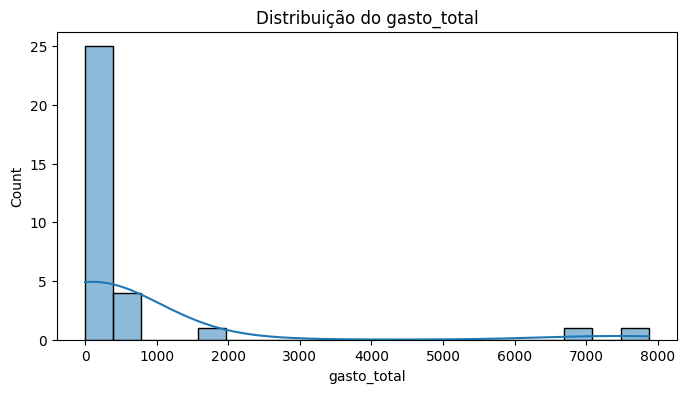

In [22]:
# Histograma de gasto_total
plt.figure(figsize=(8,4))
sns.histplot(df["gasto_total"], bins=20, kde=True)
plt.title("Distribuição do gasto_total")
plt.show()

A grande maioria das campanhas gastou bem pouco (entre R$ 0 e R$ 1500).

Existem poucas campanhas com gastos muito altos (R$ 7000–8000), chamadas de outliers.

A distribuição é fortemente assimétrica à direita (muita concentração no início, cauda longa no fim).

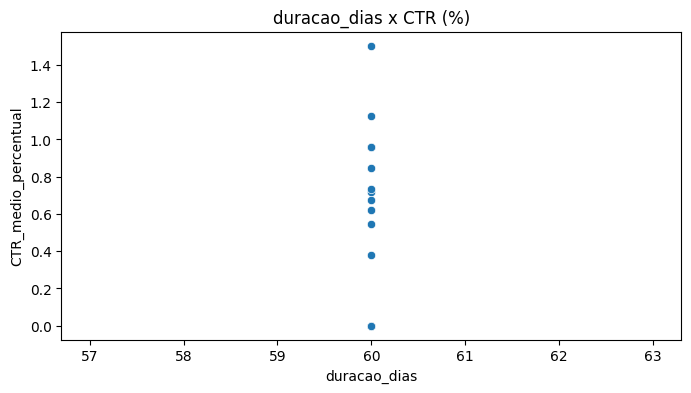

In [23]:
# Relação duração x CTR
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="duracao_dias", y="CTR_medio_percentual")
plt.title("duracao_dias x CTR (%)")
plt.show()


Todas as campanhas têm praticamente a mesma duração (58–62 dias).

Com uma variabilidade tão pequena, não existe espaço para correlação visível.

O CTR apresenta diferenças, mas elas não parecem ser explicadas pela duração.

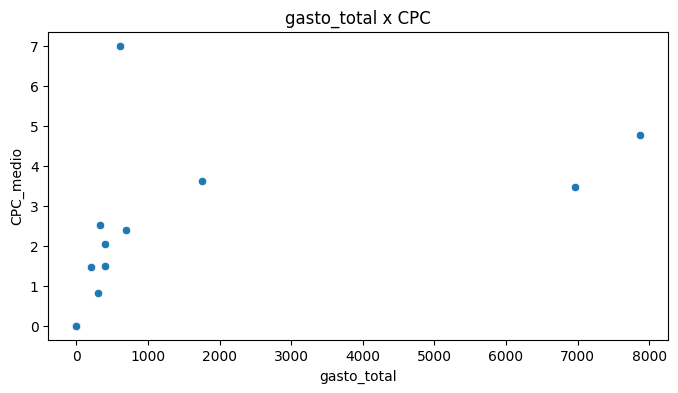

In [24]:
# Relação gasto x CPC
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="gasto_total", y="CPC_medio")
plt.title("gasto_total x CPC")
plt.show()

Os pontos se dividem em dois padrões:

1. Campanhas baratas com CPC baixo e alto

Algumas gastam pouco e têm CPC baixo → eficientes.

Outras gastam pouco, mas têm CPC alto → ineficientes.

Isso mostra que baixa verba não garante eficiência.


2. Campanhas de alto gasto com CPC moderado

As campanhas mais caras (R$ 6000+)
têm CPC entre 2 e 5 reais, nada extremo.